# Machine Learning Engineer Nanodegree
# Capstone
# Project: To find an Optimum Machine Learning Model for Human Activity        Recognition with Smartphone Sensor Data

This is the Capstone for MLND.
Our purpose is to recognize human activity based on the sensor data from smartphones and to find an optimum model with can predict these activities with high degree of accuracy.

In [1]:
# Import the Necessary Libraries

import time, pickle
import numpy as np
from numpy import array
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, log_loss

# Use pickle to open stored objects.
with open('data.pickle','rb') as f:
    data = pickle.load(f)
with open('X_train.pickle','rb') as f:
    X_train = pickle.load(f)
with open('X_test.pickle','rb') as f:
    X_test = pickle.load(f)
with open('y_train.pickle','rb') as f:
    y_train = pickle.load(f)
with open('y_test.pickle','rb') as f:
    y_test = pickle.load(f)
with open('y_true.pickle','rb') as f:
    y_true = pickle.load(f)

### Support Vector Classifier(SVC)
Let us use a SVC to how it performs against our dataset.

In [50]:
# import SVC from sklearn
from sklearn.svm import SVC

In [73]:
# predict accuracy with SVC using the processed data
clf_svc = SVC(probability=True)  # so that we can use predict.proba later for log loss
start = time.clock()
clf_svc.fit(X_train, y_train)
pred_svc = clf_svc.predict(X_test)
end = time.clock()
runtime = end-start
print('Accuracy Score for SVC is: {}'.format(accuracy_score(y_test, pred_svc)))
print('F1 Score for SVC is: {}'.format(f1_score(y_test, pred_svc, average = 'weighted')))
print('Runtime is {} seconds'.format(end-start))

Accuracy Score for SVC is: 0.944336569579
F1 Score for SVC is: 0.944145032047
Runtime is 57.966881


**Results: **Considering that we have fit the model without tuning any parameters, our SVC model is performing exceptionally in terms of F1 score.

Now, lets calculate the log loss metric for the SVC model.

One thing to keep in mind that, log loss can work only when the target variable is binary. But in our case the target class, Activities has numercal categorical values [0, 1, 2, 3, 4, 5].
We will use One Hot Encoding to the convert the numercal categorical values into binary catagorical values.

In [75]:
# Use predict prob and store into y_pred
y_pred = clf_svc.predict_proba(X_test)
print('Log Loss Score is: {}'.format(log_loss(y_true, y_pred)))

Log Loss Score is: 0.124973620049


Our unoptimized SVC has the following results:
* Accuracy Score for SVC is: 0.944336569579
* F1 Score for SVC is: 0.944145032047
* Log Loss Score is: 0.124973620049
* Runtime is 57.966881


***Let's optimize our SVC using GridSearchCV from sklearn***

For our SVC we have choosen 'rbf' as our kernel function. A SVC with 'rbf' kernel has thow parameters that needs tuning. The gamma and C. Let us create a dictonary containing ranges of gamma and C and then use GridSearch to find the best set of C and gamma.

In [26]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
clf_svc = SVC(kernel = 'rbf')
parameters = {'C':10.**np.arange(-3, 8), 'gamma': 10.**np.arange(-5, 4)} 
grid = GridSearchCV(clf_svc, parameters, scoring = 'accuracy', n_jobs = -1, verbose=True)

In [27]:
grid.fit(X_train, y_train)
print("The best classifier is: ", grid.best_estimator_)

Fitting 3 folds for each of 99 candidates, totalling 297 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 106.7min
[Parallel(n_jobs=-1)]: Done 297 out of 297 | elapsed: 149.5min finished


('The best classifier is: ', SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))


In the above code block, We are using a logarithmic grid for both parameters, which gives an optimum C=100 and gamma = 0.01. Let us use this to train and predict out svc classifier.

In [32]:
# predict accuracy with SVC using C = 100 and gamma = 0.01
clf_svc = SVC(C =100, gamma = 0.01, probability=True, random_state = 11)
start = time.clock()
clf_svc.fit(X_train, y_train)
pred_svc = clf_svc.predict(X_test)
end = time.clock()
y_pred = clf_svc.predict_proba(X_test)
runtime = end-start
print('Accuracy Score for SVC is: {}'.format(accuracy_score(y_test, pred_svc)))
print('F1 Score for SVC is: {}'.format(f1_score(y_test, pred_svc, average = 'weighted')))
print('Runtime is {} seconds'.format(end-start))
print('Log Loss Score is: {}'.format(log_loss(y_true, y_pred)))

Accuracy Score for SVC is: 0.991909385113
F1 Score for SVC is: 0.991903881519
Runtime is 19.881993 seconds
Log Loss Score is: 0.0256942250936


**Result: **Our model's F1 and log loss score has improved quite a lot for C = 100 and gamma = 0.01.

Let us again use Grid Search to tune C and gmma further.

In [41]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
clf_svc = SVC(kernel = 'rbf', random_state = 11)
parameters = {'C':[i for i in range(86, 101,1)], 'gamma': [0.0080, 0.0085, 0.009, 0.01, 0.0101]} 
grid = GridSearchCV(clf_svc, parameters, scoring = 'accuracy', n_jobs = -1, verbose=True)
grid.fit(X_train, y_train)
print("The best classifier is: ", grid.best_estimator_)
print("The best classifier is: ", grid.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 16.5min finished


('The best classifier is: ', SVC(C=99, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0085, kernel='rbf',
  max_iter=-1, probability=False, random_state=11, shrinking=True,
  tol=0.001, verbose=False))
('The best classifier is: ', 0.98737688999861284)


Grid Search gives an optimum C=99 and gamma = 0.0085 this time. Lets se how our model performs with these vaues.

In [43]:
# predict accuracy with SVC using C = 99 and gamma = 0.0085
clf_svc = SVC(C = 99, gamma = 0.0085, probability=True, random_state = 1)
start = time.clock()
clf_svc.fit(X_train, y_train)
pred_svc = clf_svc.predict(X_test)
end = time.clock()
y_pred = clf_svc.predict_proba(X_test)
runtime = end-start
print('Accuracy Score for SVC is: {}'.format(accuracy_score(y_test, pred_svc)))
print('F1 Score for SVC is: {}'.format(f1_score(y_test, pred_svc, average = 'weighted')))
print('Runtime is {} seconds'.format(end-start))
print('Log Loss Score is: {}'.format(log_loss(y_true, y_pred)))

Accuracy Score for SVC is: 0.992233009709
F1 Score for SVC is: 0.992227107078
Runtime is 18.730906 seconds
Log Loss Score is: 0.0256282742758


**Result:** F1 score and log loss has improved a little compared to the earlier values. So C = 99 and gamma = 0.0085 is our new optimum parameter values.

Lets do grid search one more time to see if we can improve or predictions further.

In [38]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
clf_svc = SVC(kernel = 'rbf', random_state = 11)
parameters = {'C':[i*10 for i in range(6, 13)], 'gamma': [0.008, 0.0085, 0.009, 0.01, 0.0101]} 
grid = GridSearchCV(clf_svc, parameters, scoring = 'accuracy', n_jobs = -1, verbose=True)
grid.fit(X_train, y_train)
print("The best classifier is: ", grid.best_estimator_)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:  8.8min finished


('The best classifier is: ', SVC(C=120, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.008, kernel='rbf',
  max_iter=-1, probability=False, random_state=11, shrinking=True,
  tol=0.001, verbose=False))


In [39]:
grid.best_score_

0.98751560549313355

In [40]:
# predict accuracy with SVC using C = 120 and gamma = 0.008
clf_svc = SVC(C = 120, gamma = 0.008, probability=True, random_state = 12)
start = time.clock()
clf_svc.fit(X_train, y_train)
pred_svc = clf_svc.predict(X_test)
end = time.clock()
y_pred = clf_svc.predict_proba(X_test)
runtime = end-start
print('Accuracy Score for SVC is: {}'.format(accuracy_score(y_test, pred_svc)))
print('F1 Score for SVC is: {}'.format(f1_score(y_test, pred_svc, average = 'weighted')))
print('Runtime is {} seconds'.format(end-start))
print('Log Loss Score is: {}'.format(log_loss(y_true, y_pred)))

Accuracy Score for SVC is: 0.991909385113
F1 Score for SVC is: 0.991902594616
Runtime is 19.64797 seconds
Log Loss Score is: 0.0264823181324


**Results:**
As we can see this time, for the Grid Search best patameters, our model perform worse on the test set, as f1 decreases and log loss increases compared to the earlier values. So our model is overfitting. So we will not consider these set of param values and our optimum C and gmma will remain same.

* C : 99
* gamma: 0.0085

### SVC: Optimum Values:
Let us store the optimum values for SVC for later comparisions:
* Accuracy Score for SVC is: 0.992233009709
* F1 Score for SVC is: 0.992227107078
* Runtime is 18.730906 seconds
* Log Loss Score is: 0.0256282742758

### Training Accuracy plot using matplotlib
Let us use matplotlib to plot a graph showing training accuracy vs cv accuracy

Reference:_(http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)_

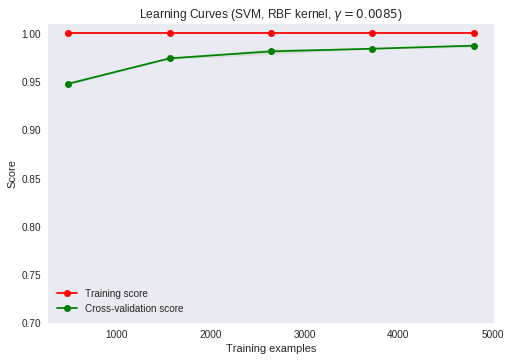

In [43]:
# import SVC from sklearn
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

# Define the plotting function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



X, y = X_train, y_train


title = "Learning Curves (SVM, RBF kernel, $\gamma=0.0085$)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=99)
estimator = SVC(C = 99, gamma = 0.0085, probability=True, random_state = 121)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv= None, n_jobs= -1)

plt.show()